In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Load the dataset

In [ ]:
data=pd.read_excel('/content/database GMAM.xlsx')
data

,Date,PrixArgent,Prix Or,Prix Pétrole brut,Prix Gaz naturel,Prix Blé,Prix Café Robusta,Prix Café Arabica,Réserve extérieur,Taux de chomage,Production Industrielle,Export,Import,Indice des prix à la consommation,revenu personnel,Dépenses de consommation personnelle,Downjones,NASDAQ,S&P 500,EUR/USD
0,2016-11-15,786.38,476.67,54.98,10.30,161.12,54.72,108.81,68773,5.0,100.9014,107.6,112.3,198.100,10878.1,8987.689,10805.87,2232.82,1249.479980,1.179441
1,2016-12-15,868.74,510.1,56.47,13.05,164.44,59.01,103.03,65127,4.9,101.4873,107.7,112.3,198.100,10939.9,9026.766,10717.50,2205.32,1248.290039,1.186395
2,2017-01-15,918.48,549.86,62.36,8.69,167.16,66.45,124.36,65594,4.7,101.6088,108.5,113.7,199.300,11154.6,9100.107,10864.86,2305.82,1280.079956,1.211845
3,2017-02-15,952.13,555,59.71,7.53,179.84,65.46,118.52,65364,4.8,101.6839,108.6,112.8,199.400,11216.5,9134.653,10993.41,2281.39,1280.660034,1.194210
4,2017-03-15,1 037.52,557.09,60.93,6.88,174.44,62.92,112.20,65354,4.7,101.8522,108.8,112.7,199.700,11263.0,9168.089,11109.32,2339.79,1294.869995,1.203257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2023-08-15,2 189.39,1 351.74,108.06,3.43,305.49,100.73,135.63,145755,7.3,101.9928,131.9,139.4,233.249,14137.4,11370.236,14810.31,3589.87,1632.969971,1.331714
94,2023-09-15,2 256.38,1 348.60,108.78,3.62,307.51,93.48,132.78,147747,7.3,102.4847,132.4,139.8,233.642,14188.9,11423.949,15129.67,3771.48,1681.550049,1.336076
95,2023-10-15,2 191.70,1 316.58,105.46,3.67,325.07,90.01,128.83,147086,7.2,102.4287,131.6,138.9,233.799,14176.3,11465.233,15545.75,3919.71,1756.540039,1.363757
96,2023-11-15,2 075.76,1 275.86,102.58,3.62,306.75,85.67,122.75,145112,6.9,102.7732,131.8,137.7,234.210,14243.8,11541.950,16086.41,4059.89,1805.810059,1.349576


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preparation

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  98 non-null     datetime64[ns]
 1   PrixArgent                            98 non-null     object        
 2   Prix Or                               98 non-null     object        
 3   Prix Pétrole brut                     98 non-null     float64       
 4   Prix Gaz naturel                      98 non-null     float64       
 5   Prix Blé                              98 non-null     float64       
 6   Prix Café Robusta                     98 non-null     float64       
 7   Prix Café Arabica                     98 non-null     float64       
 8   Réserve extérieur                     98 non-null     int64         
 9   Taux de chomage                       98 non-null     float64       
 10  Prod

In [ ]:
data.columns

Index(['Date', 'PrixArgent', 'Prix Or', 'Prix Pétrole brut',
       'Prix Gaz naturel ', 'Prix Blé ', 'Prix Café Robusta',
       'Prix Café Arabica ', 'Réserve extérieur', 'Taux de chomage',
       'Production Industrielle', 'Export ', 'Import ',
       'Indice des prix à la consommation', ' revenu personnel',
       'Dépenses de consommation personnelle', 'Downjones', 'NASDAQ',
       'S&P 500', 'EUR/USD'],
      dtype='object')

In [ ]:
data['Pouvoir d\'achat'] = data[' revenu personnel'] / data['Indice des prix à la consommation']
data

,Date,PrixArgent,Prix Or,Prix Pétrole brut,Prix Gaz naturel,Prix Blé,Prix Café Robusta,Prix Café Arabica,Réserve extérieur,Taux de chomage,...,Export,Import,Indice des prix à la consommation,revenu personnel,Dépenses de consommation personnelle,Downjones,NASDAQ,S&P 500,EUR/USD,Pouvoir d'achat
0,2016-11-15,786.38,476.67,54.98,10.30,161.12,54.72,108.81,68773,5.0,...,107.6,112.3,198.100,10878.1,8987.689,10805.87,2232.82,1249.479980,1.179441,54.912166
1,2016-12-15,868.74,510.1,56.47,13.05,164.44,59.01,103.03,65127,4.9,...,107.7,112.3,198.100,10939.9,9026.766,10717.50,2205.32,1248.290039,1.186395,55.224129
2,2017-01-15,918.48,549.86,62.36,8.69,167.16,66.45,124.36,65594,4.7,...,108.5,113.7,199.300,11154.6,9100.107,10864.86,2305.82,1280.079956,1.211845,55.968891
3,2017-02-15,952.13,555,59.71,7.53,179.84,65.46,118.52,65364,4.8,...,108.6,112.8,199.400,11216.5,9134.653,10993.41,2281.39,1280.660034,1.194210,56.251254
4,2017-03-15,1 037.52,557.09,60.93,6.88,174.44,62.92,112.20,65354,4.7,...,108.8,112.7,199.700,11263.0,9168.089,11109.32,2339.79,1294.869995,1.203257,56.399599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2023-08-15,2 189.39,1 351.74,108.06,3.43,305.49,100.73,135.63,145755,7.3,...,131.9,139.4,233.249,14137.4,11370.236,14810.31,3589.87,1632.969971,1.331714,60.610764
94,2023-09-15,2 256.38,1 348.60,108.78,3.62,307.51,93.48,132.78,147747,7.3,...,132.4,139.8,233.642,14188.9,11423.949,15129.67,3771.48,1681.550049,1.336076,60.729235
95,2023-10-15,2 191.70,1 316.58,105.46,3.67,325.07,90.01,128.83,147086,7.2,...,131.6,138.9,233.799,14176.3,11465.233,15545.75,3919.71,1756.540039,1.363757,60.634562
96,2023-11-15,2 075.76,1 275.86,102.58,3.62,306.75,85.67,122.75,145112,6.9,...,131.8,137.7,234.210,14243.8,11541.950,16086.41,4059.89,1805.810059,1.349576,60.816361


In [ ]:
features = ['PrixArgent', 'Prix Or', 'Prix Pétrole brut',
            'Prix Gaz naturel ', 'Prix Blé ', 'Prix Café Robusta',
            'Prix Café Arabica ','Production Industrielle','Dépenses de consommation personnelle',
            'Downjones', 'NASDAQ', 'S&P 500', 'EUR/USD']
target = 'Pouvoir d\'achat'
for feature in features:
    for index, value in data[feature].items():
        try:
            float(value) 
        except ValueError:
            cleaned_value = str(value).replace('\xa0', '').replace(',', '.')  
            try:
                data.loc[index, feature] = float(cleaned_value)
                print(f"Transformed element in column '{feature}', index {index}: {value} -> {cleaned_value}")
            except ValueError:
                print(f"Could not transform element in column '{feature}', index {index}: {value}")


Transformed element in column 'PrixArgent', index 4: 1 037.52 -> 1037.52
Transformed element in column 'PrixArgent', index 5: 1 263.16 -> 1263.16
Transformed element in column 'PrixArgent', index 6: 1 337.84 -> 1337.84
Transformed element in column 'PrixArgent', index 7: 1 077.41 -> 1077.41
Transformed element in column 'PrixArgent', index 8: 1 121.24 -> 1121.24
Transformed element in column 'PrixArgent', index 9: 1 225.39 -> 1225.39
Transformed element in column 'PrixArgent', index 10: 1 159.93 -> 1159.93
Transformed element in column 'PrixArgent', index 11: 1 161.55 -> 1161.55
Transformed element in column 'PrixArgent', index 12: 1 298.45 -> 1298.45
Transformed element in column 'PrixArgent', index 13: 1 329.83 -> 1329.83
Transformed element in column 'PrixArgent', index 14: 1 286.63 -> 1286.63
Transformed element in column 'PrixArgent', index 15: 1 394.58 -> 1394.58
Transformed element in column 'PrixArgent', index 16: 1 316.27 -> 1316.27
Transformed element in column 'PrixArgent', 

In [ ]:
X = data[features].astype(float)
y = data[target].astype(float)

In [ ]:
print(data[feature].dtypes)

float64


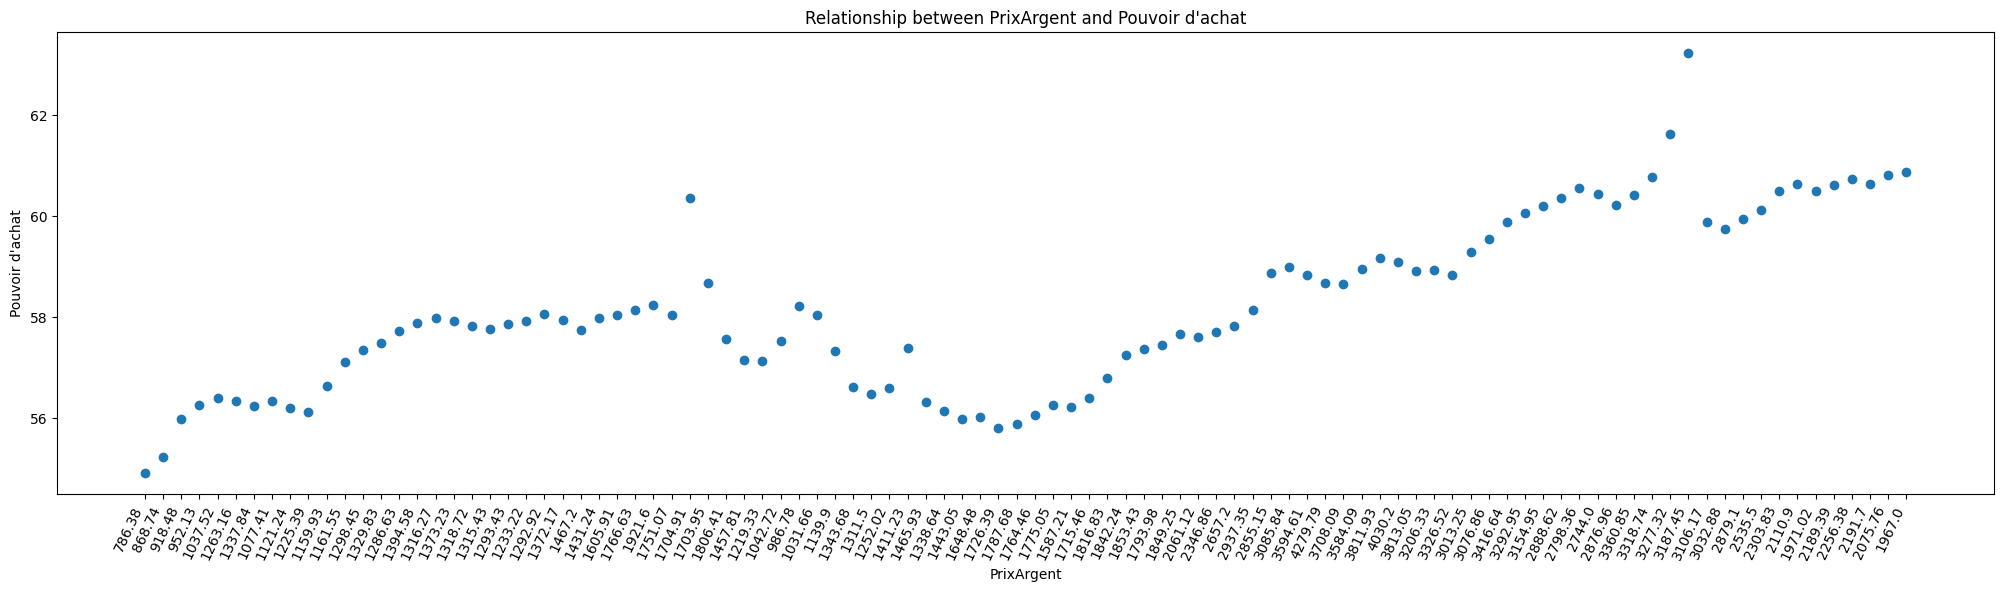

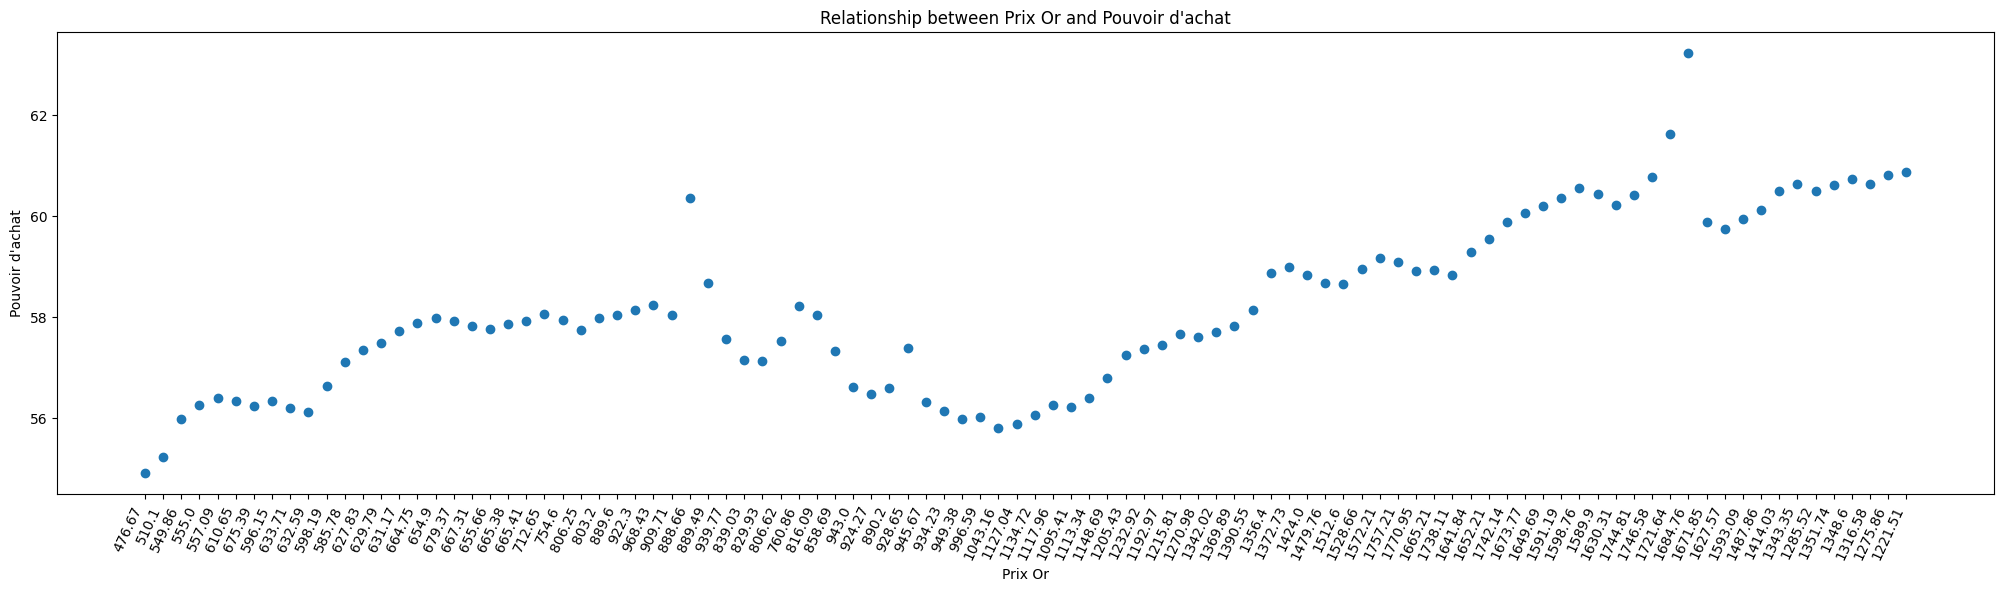

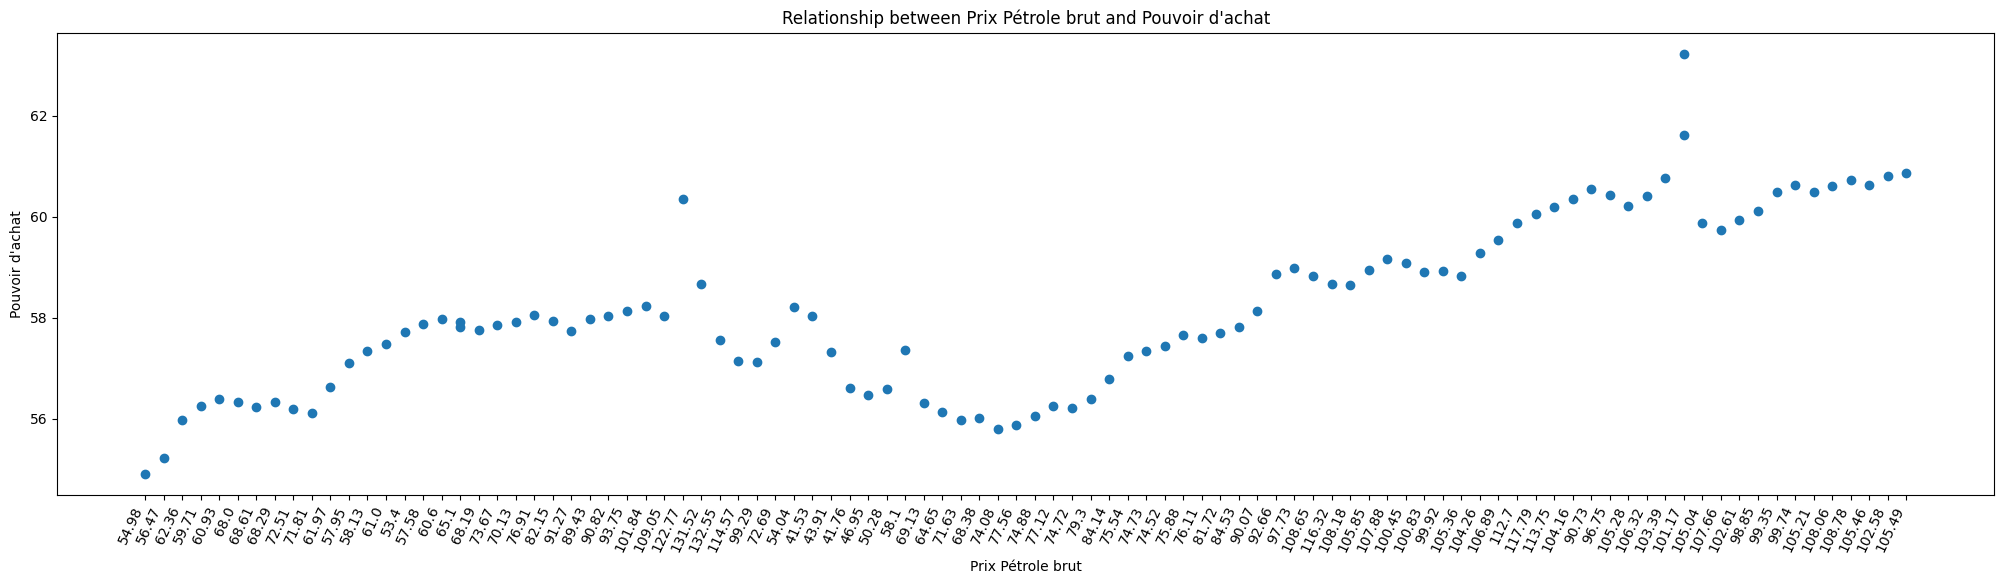

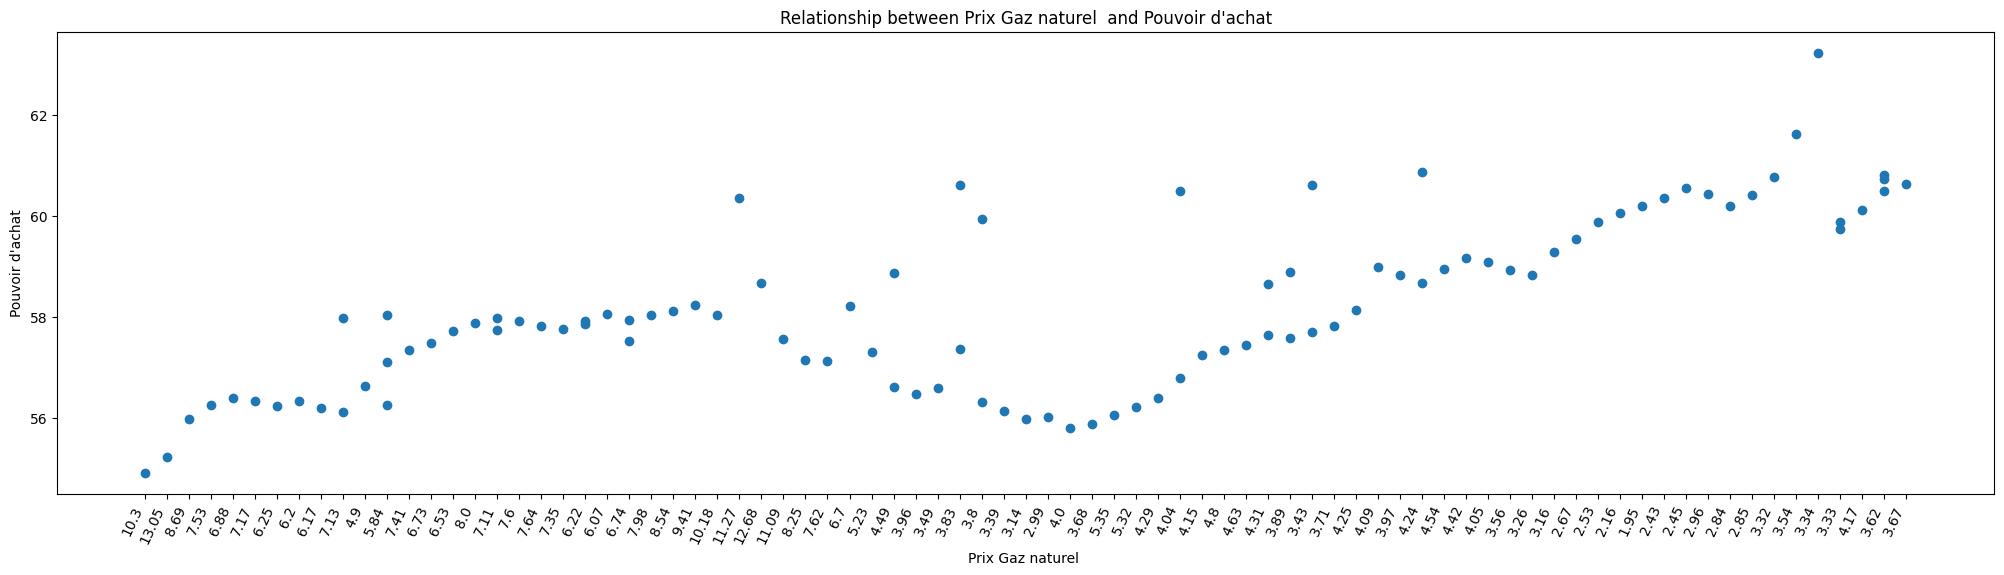

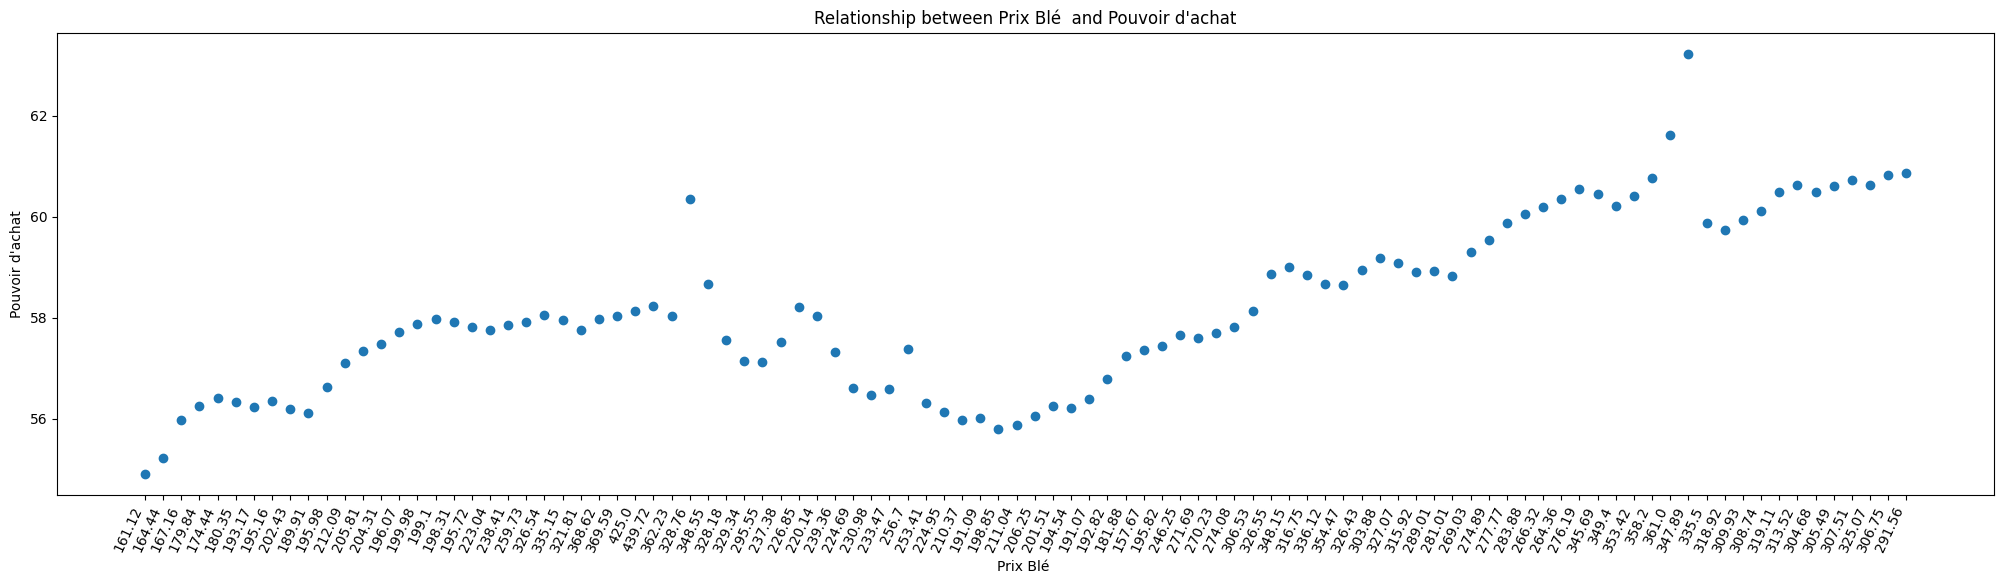

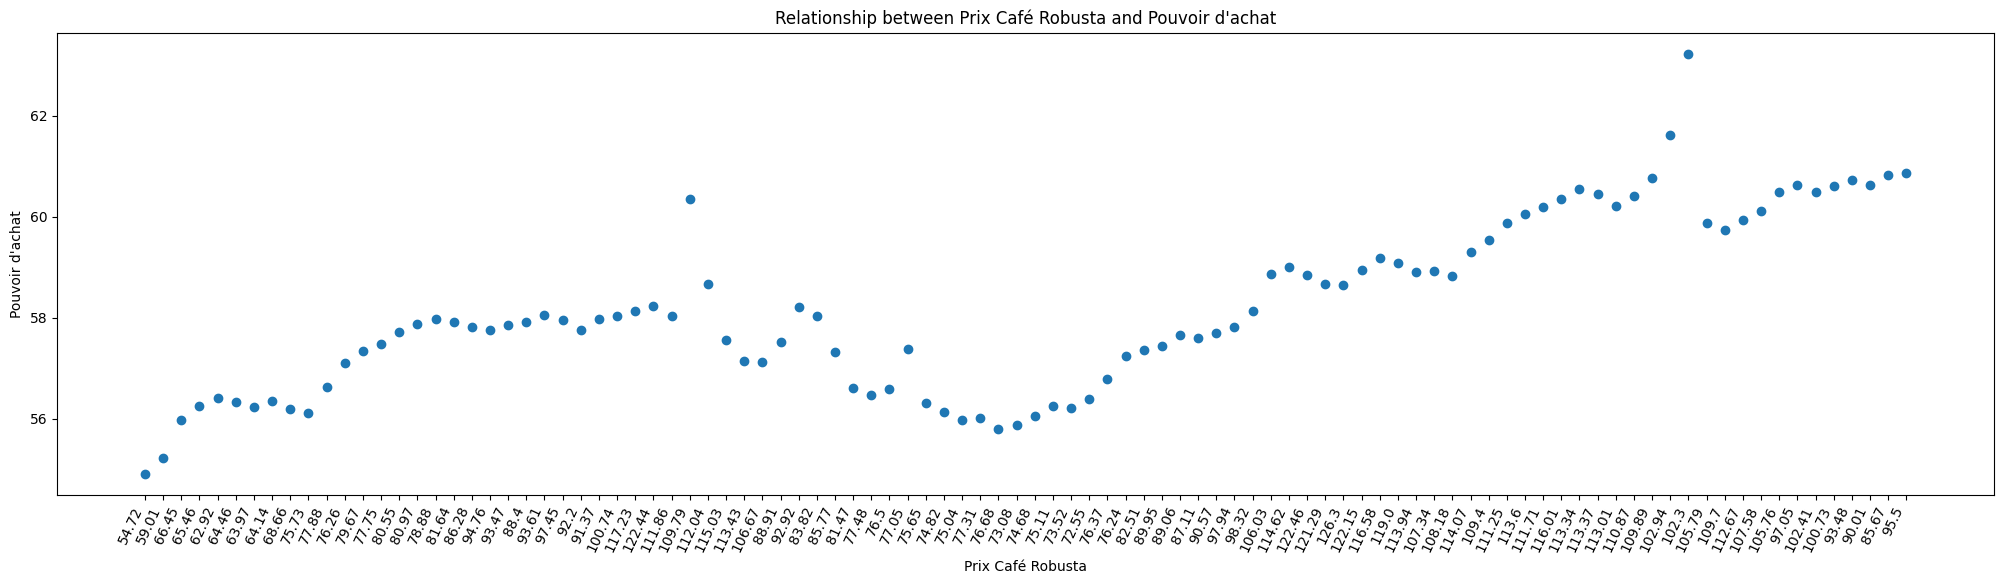

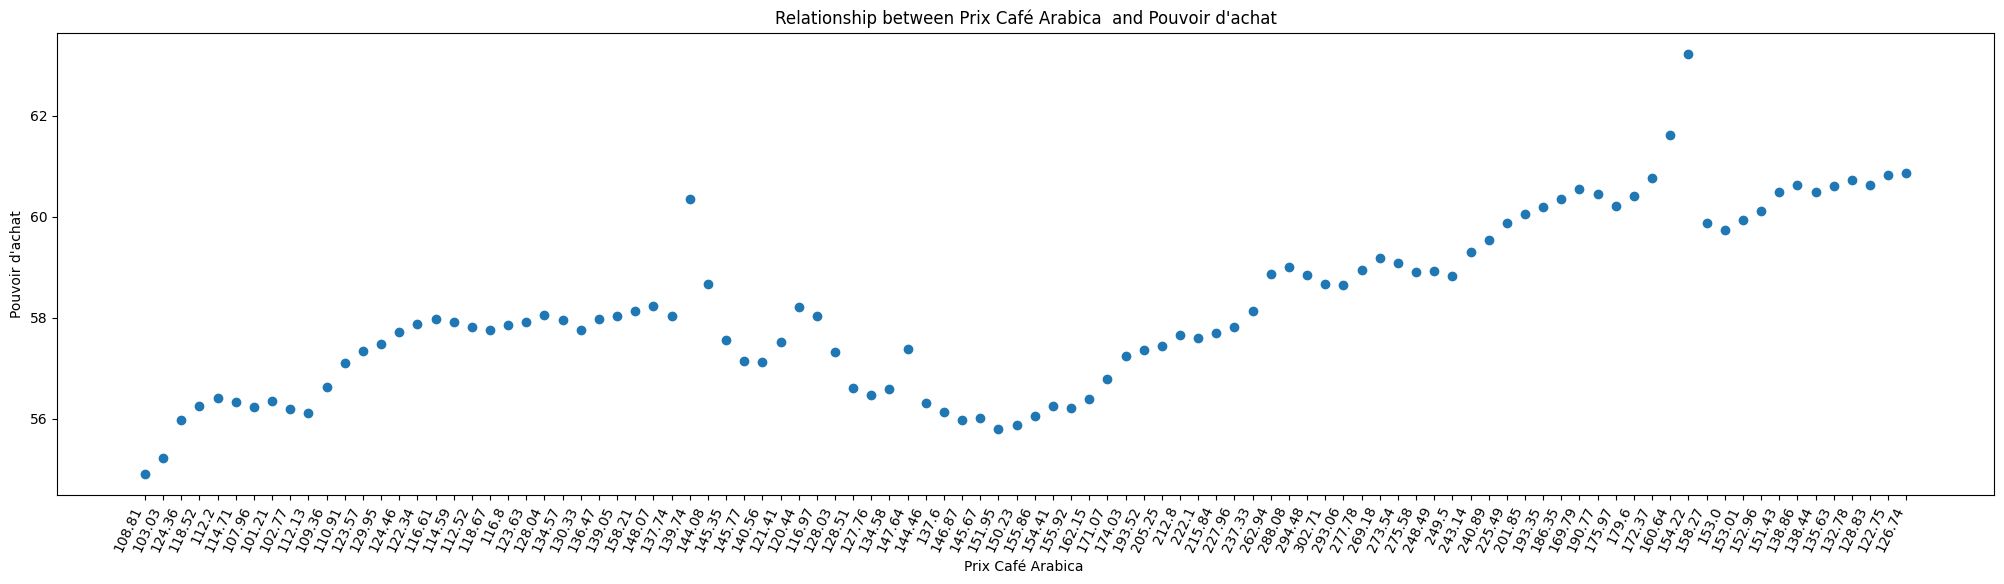

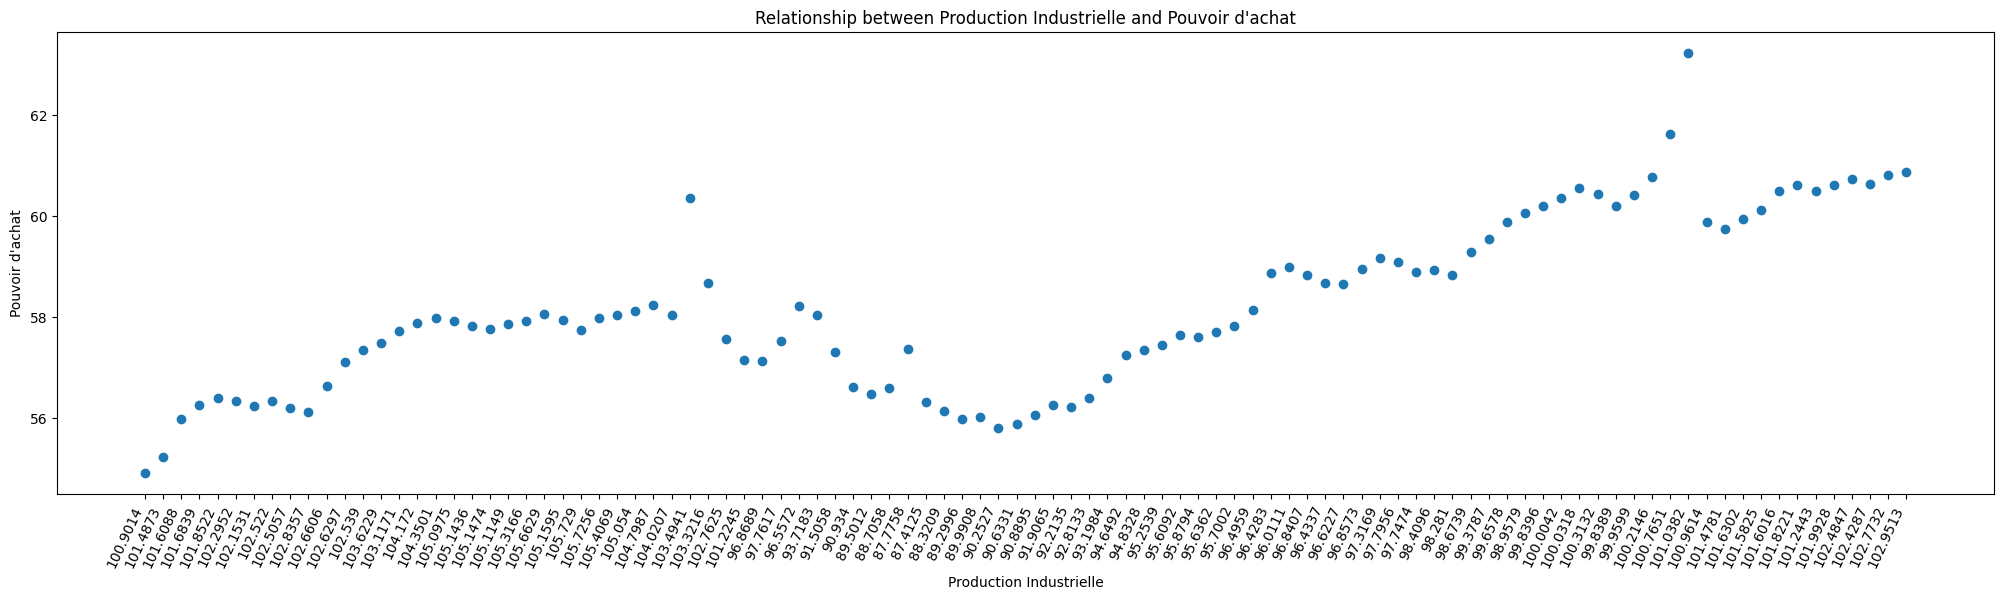

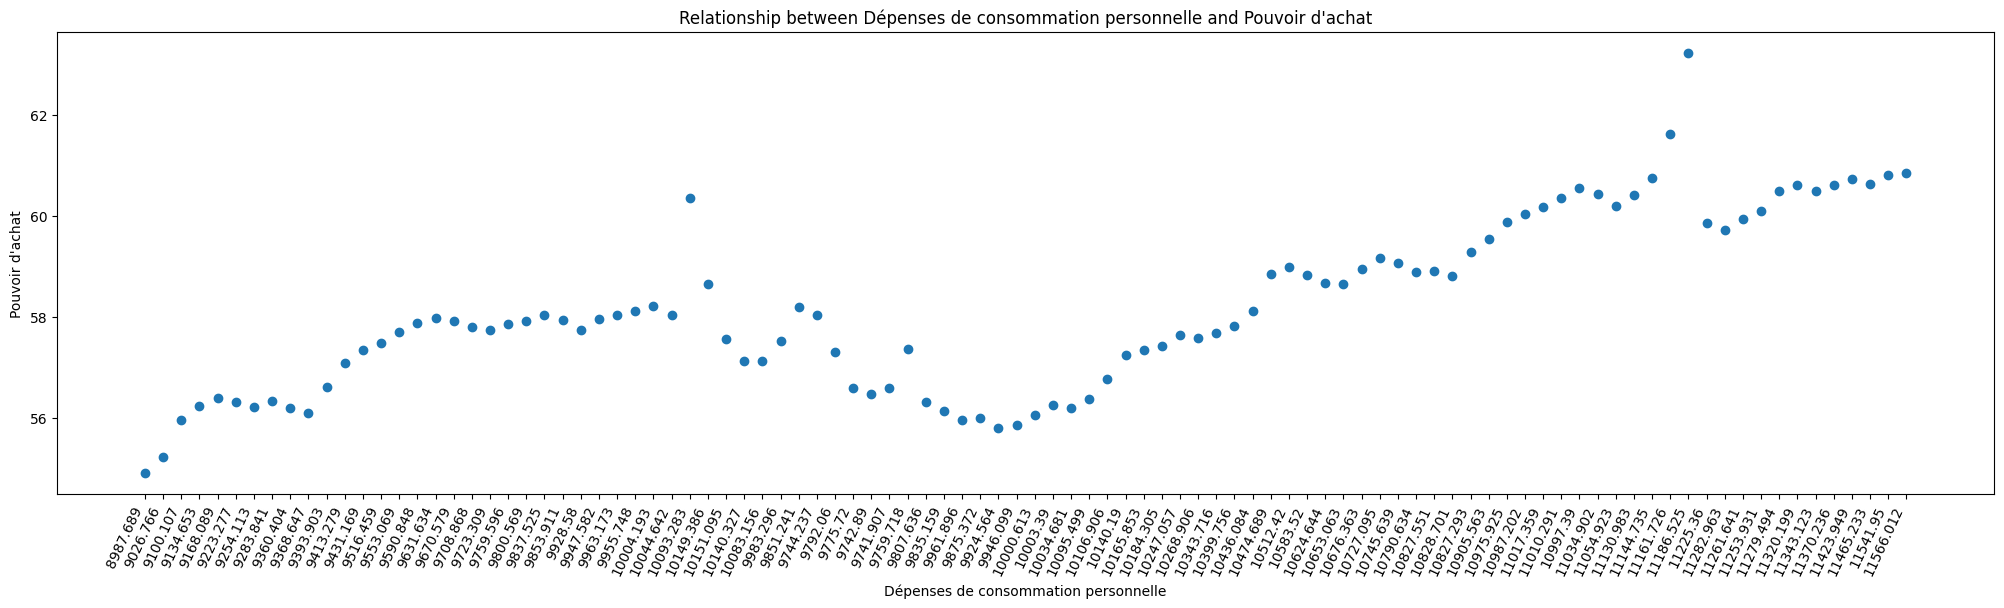

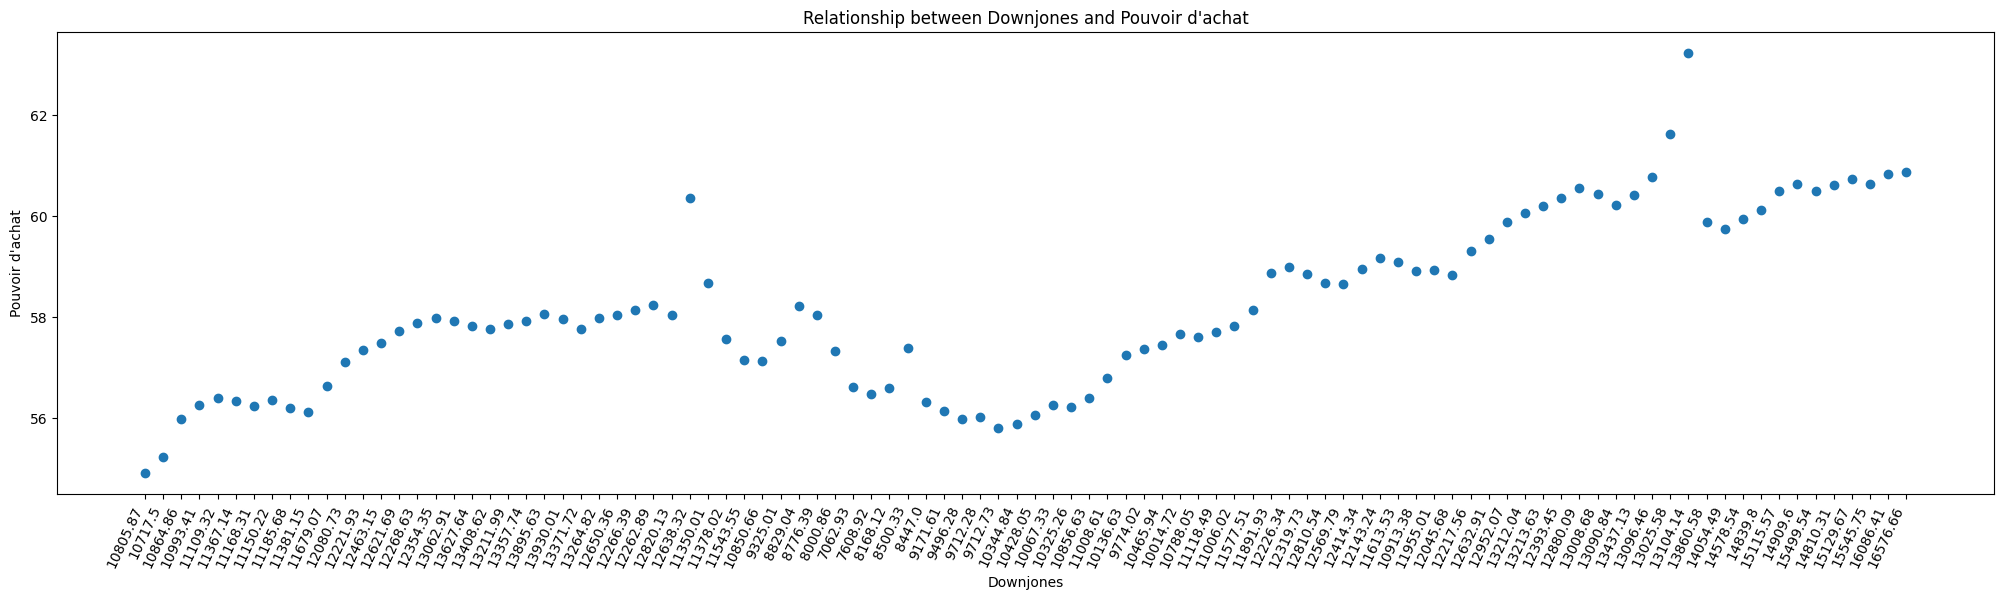

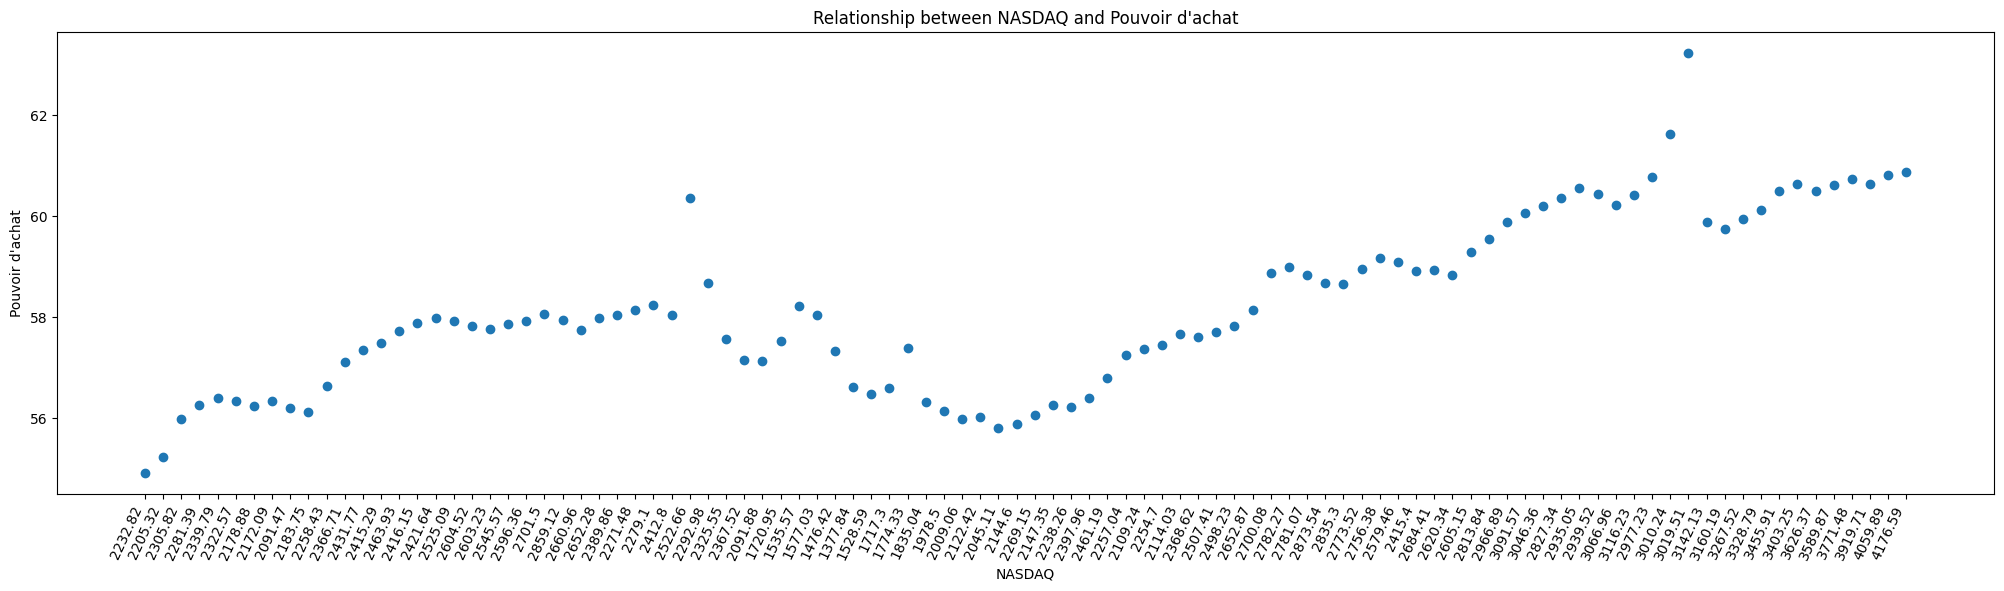

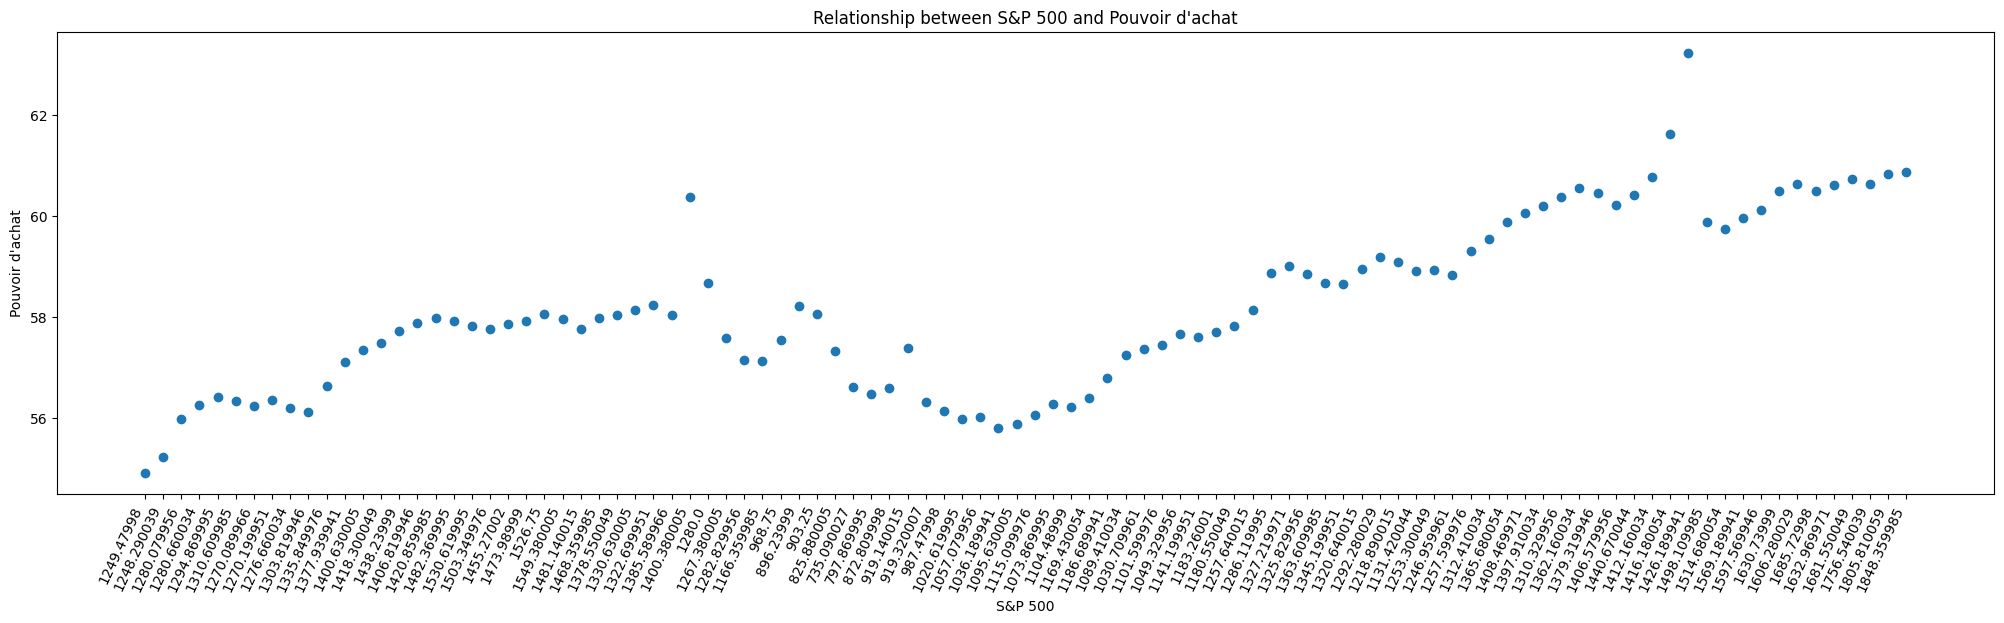

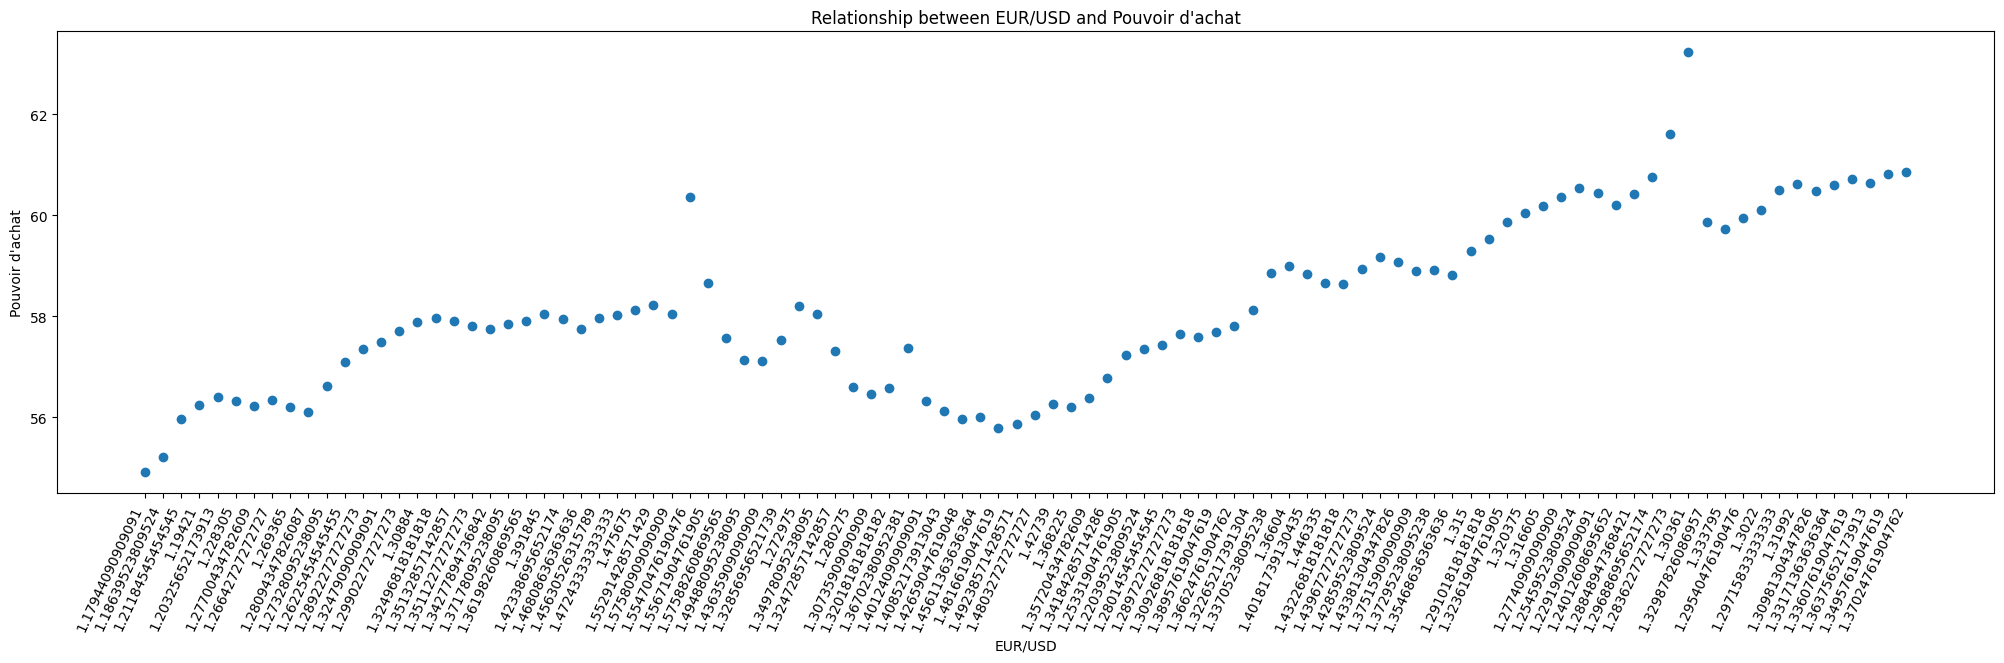

In [ ]:
for feature in features:
    plt.figure(figsize=(25, 6))  
    plt.scatter(X[feature].astype(str), y)  
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"Relationship between {feature} and {target}")
    plt.xticks(rotation=65, ha='right')  
    plt.show()

In [ ]:
data = data.dropna(subset=features + [target])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [ ]:
X_train['PrixArgent'] = pd.to_numeric(X_train['PrixArgent'], errors='coerce')
X_train['Prix Or'] = pd.to_numeric(X_train['Prix Or'], errors='coerce')

In [ ]:
X=data.drop(['Pouvoir d\'achat','Date'],axis=1)
X

,PrixArgent,Prix Or,Prix Pétrole brut,Prix Gaz naturel,Prix Blé,Prix Café Robusta,Prix Café Arabica,Réserve extérieur,Taux de chomage,Production Industrielle,Export,Import,Indice des prix à la consommation,revenu personnel,Dépenses de consommation personnelle,Downjones,NASDAQ,S&P 500,EUR/USD
0,786.38,476.67,54.98,10.30,161.12,54.72,108.81,68773,5.0,100.9014,107.6,112.3,198.100,10878.1,8987.689,10805.87,2232.82,1249.479980,1.179441
1,868.74,510.1,56.47,13.05,164.44,59.01,103.03,65127,4.9,101.4873,107.7,112.3,198.100,10939.9,9026.766,10717.50,2205.32,1248.290039,1.186395
2,918.48,549.86,62.36,8.69,167.16,66.45,124.36,65594,4.7,101.6088,108.5,113.7,199.300,11154.6,9100.107,10864.86,2305.82,1280.079956,1.211845
3,952.13,555,59.71,7.53,179.84,65.46,118.52,65364,4.8,101.6839,108.6,112.8,199.400,11216.5,9134.653,10993.41,2281.39,1280.660034,1.194210
4,1037.52,557.09,60.93,6.88,174.44,62.92,112.20,65354,4.7,101.8522,108.8,112.7,199.700,11263.0,9168.089,11109.32,2339.79,1294.869995,1.203257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2189.39,1351.74,108.06,3.43,305.49,100.73,135.63,145755,7.3,101.9928,131.9,139.4,233.249,14137.4,11370.236,14810.31,3589.87,1632.969971,1.331714
94,2256.38,1348.6,108.78,3.62,307.51,93.48,132.78,147747,7.3,102.4847,132.4,139.8,233.642,14188.9,11423.949,15129.67,3771.48,1681.550049,1.336076
95,2191.7,1316.58,105.46,3.67,325.07,90.01,128.83,147086,7.2,102.4287,131.6,138.9,233.799,14176.3,11465.233,15545.75,3919.71,1756.540039,1.363757
96,2075.76,1275.86,102.58,3.62,306.75,85.67,122.75,145112,6.9,102.7732,131.8,137.7,234.210,14243.8,11541.950,16086.41,4059.89,1805.810059,1.349576


In [ ]:
data = data.dropna(subset=features + [target])

## Model building

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_lr_train_pred=lr.predict(X_train)
y_lr_test_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2  = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2  = r2_score(y_test, y_lr_test_pred)

In [ ]:
print("LR MSE (train) :" , lr_train_mse)
print("LR r2 (train) :" , lr_train_r2)
print("LR MSE (test) :" , lr_test_mse)
print("LR r2 (test) :" , lr_test_r2)


LR MSE (train) : 0.2728391872308249
LR r2 (train) : 0.9082935745044565
LR MSE (test) : 0.19880791603436904
LR r2 (test) : 0.878746183896935


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=5, random_state=46)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=46)

In [ ]:
y_rf_train_pred= rf.predict(X_train)
y_rf_test_pred= rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2  = r2_score(y_train, y_lr_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2  = r2_score(y_test, y_rf_test_pred)


In [ ]:
rf_results=pd.DataFrame(['Random forest',rf_train_mse,rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns=["Method","Training MSE","Training R2","Test MSE","Test R2"]
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.051573,0.908294,0.246397,0.849722


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(1, 20)}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Meilleurs paramètres
best_params = grid_search.best_params_
print("Meilleurs paramètres :", best_params)

# Meilleur modèle
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 19 candidates, totalling 95 fits
Meilleurs paramètres : {'max_depth': 6}


In [ ]:
# Meilleurs paramètres obtenus via Grid Search
best_params_rf = grid_search.best_params_

# Création du modèle avec les meilleurs paramètres
best_rf = RandomForestRegressor(**best_params_rf, random_state=46)

# Entraînement du modèle sur les données d'entraînement
best_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=6, random_state=46)

In [ ]:
y_rf_train_pred= best_rf.predict(X_train)
y_rf_test_pred= best_rf.predict(X_test)

best_rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
best_rf_train_r2  = r2_score(y_train, y_lr_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2  = r2_score(y_test, y_rf_test_pred)
rf_results=pd.DataFrame(['Random forest',rf_train_mse,rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns=["Method","Training MSE","Training R2","Test MSE","Test R2"]
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.051573,0.908294,0.241756,0.852552


In [ ]:
lr_results=pd.DataFrame(['Linear Regression',lr_train_mse,lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns=["Method","Training MSE","Training R2","Test MSE","Test R2"]
df_models = pd.concat([lr_results,rf_results], axis = 0)
df_models


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.272839,0.908294,0.198808,0.878746
0,Random forest,0.051573,0.908294,0.241756,0.852552


### xgboost

In [ ]:
!pip install xgboost

In [ ]:

import xgboost as xgb

xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=46)


xgbr.fit(X_train, y_train)

X_test['PrixArgent'] = pd.to_numeric(X_test['PrixArgent'], errors='coerce')
X_test['Prix Or'] = pd.to_numeric(X_test['Prix Or'], errors='coerce')
y_xgbr_train_pred = xgbr.predict(X_train)
y_xgbr_test_pred = xgbr.predict(X_test)


xgbr_train_mse = mean_squared_error(y_train, y_xgbr_train_pred)
xgbr_train_r2 = r2_score(y_train, y_xgbr_train_pred)

xgbr_test_mse = mean_squared_error(y_test, y_xgbr_test_pred)
xgbr_test_r2 = r2_score(y_test, y_xgbr_test_pred)


xgbr_results = pd.DataFrame(['XGBoost', xgbr_train_mse, xgbr_train_r2, xgbr_test_mse, xgbr_test_r2]).transpose()
xgbr_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]


df_models = pd.concat([lr_results, rf_results, xgbr_results], axis=0)
print(df_models)

              Method Training MSE Training R2  Test MSE   Test R2
0  Linear Regression     0.272839    0.908294  0.198808  0.878746
0      Random forest     0.051573    0.908294  0.241756  0.852552
0            XGBoost          0.0         1.0  0.145741  0.911112


In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.272839,0.908294,0.198808,0.878746
1,Random forest,0.051573,0.908294,0.241756,0.852552
2,XGBoost,0.0,1.0,0.145741,0.911112


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Training MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Training R2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Test MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training MSE'].value_counts()
    for x_label, grp in _df_4.groupby('Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Method')
_ = plt.ylabel('Training MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training R2'].value_counts()
    for x_label, grp in _df_5.groupby('Training MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training MSE')
_ = plt.ylabel('Training R2')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test MSE'].value_counts()
    for x_label, grp in _df_6.groupby('Training R2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training R2')
_ = plt.ylabel('Test MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test R2'].value_counts()
    for x_label, grp in _df_7.groupby('Test MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Test MSE')
_ = plt.ylabel('Test R2')

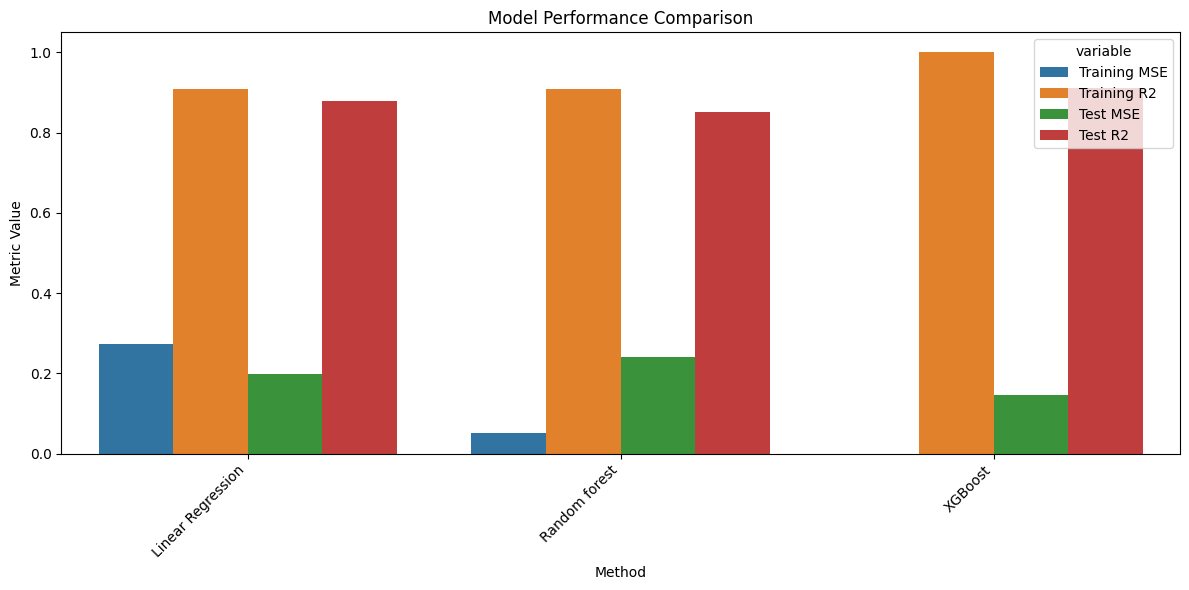

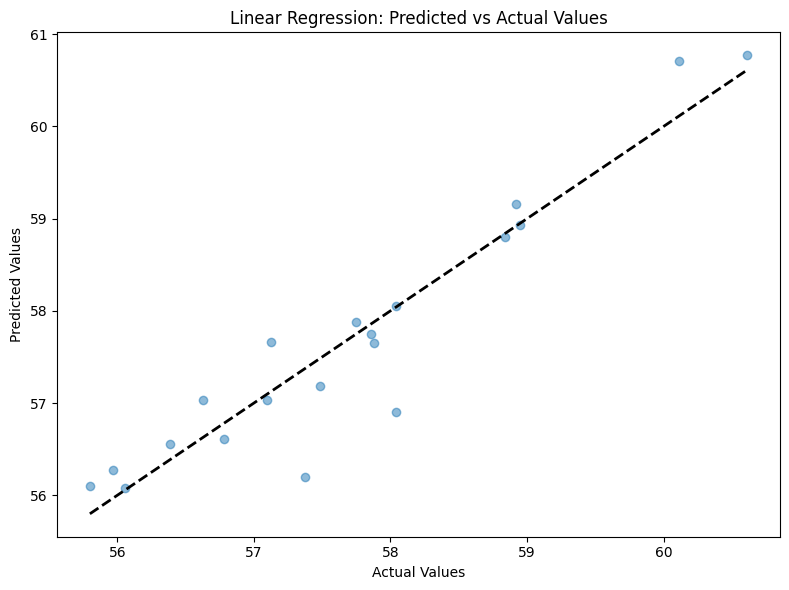

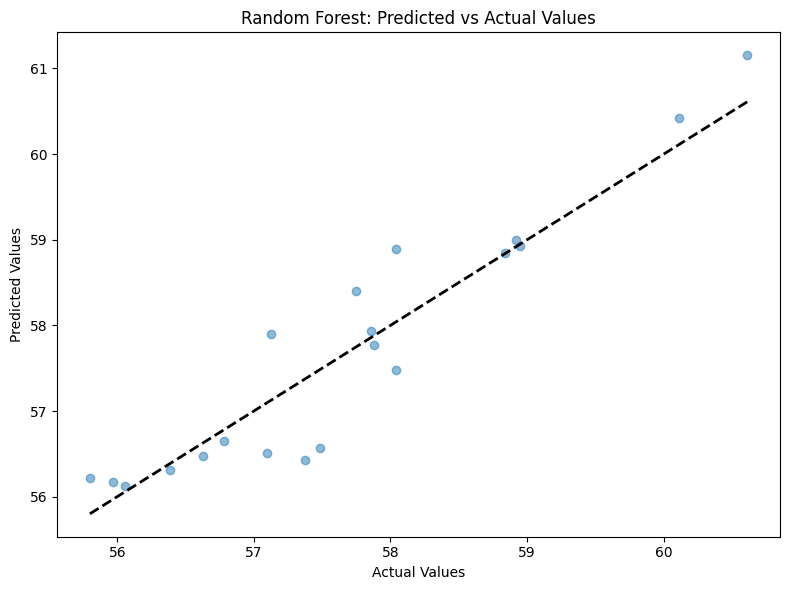

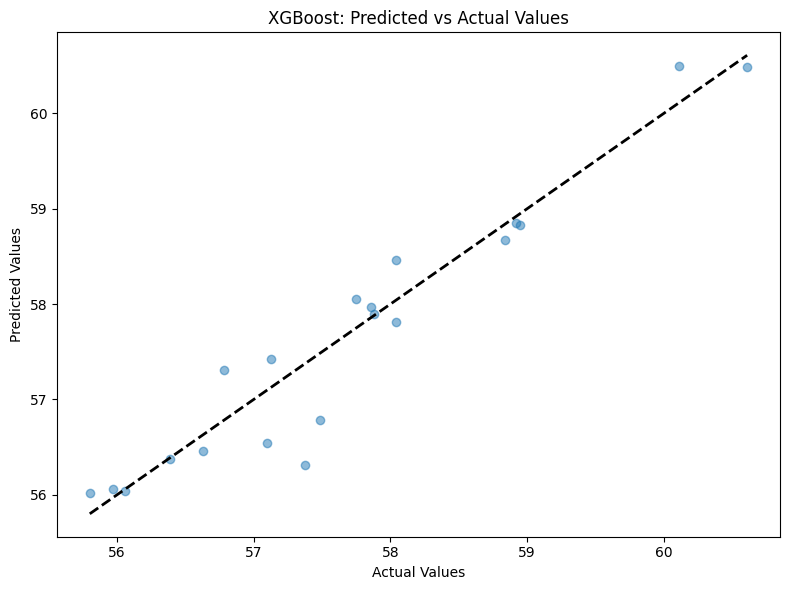

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df_models_melted = pd.melt(df_models, id_vars=['Method'], value_vars=['Training MSE', 'Training R2', 'Test MSE', 'Test R2'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Method', y='value', hue='variable', data=df_models_melted)
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

models = {
    'Linear Regression': y_lr_test_pred,
    'Random Forest': y_rf_test_pred,
    'XGBoost': y_xgbr_test_pred
}

for model_name, y_pred in models.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name}: Predicted vs Actual Values')
    plt.tight_layout()
    plt.show()